In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as st
import seaborn as sns

In [ ]:
data = pd.read_csv("/home/hk/courses/cgs698c/data/htWtAgeGender.csv", sep=',')
# data from McElreath's Statistical Rethinking data sets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


In [ ]:
dataAdult=data[data.age>=18]
dataAdult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  352 non-null    float64
 1   weight  352 non-null    float64
 2   age     352 non-null    float64
 3   male    352 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 13.8 KB


In [ ]:
adultHtMean=dataAdult.height.mean()
adultWtMean=dataAdult.weight.mean()
adultHtSD=dataAdult.height.std()
adultWtSD=dataAdult.weight.std()
print('Mean ht =',adultHtMean,'\tMean wt =',adultWtMean,'\nSD ht =',adultHtSD,'\tSD wt =',adultWtSD)

Mean ht = 154.59709261363636 	Mean wt = 44.99048551988634 
SD ht = 7.742332137351996 	SD wt = 6.456708107277597


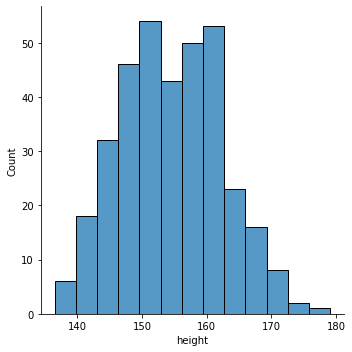

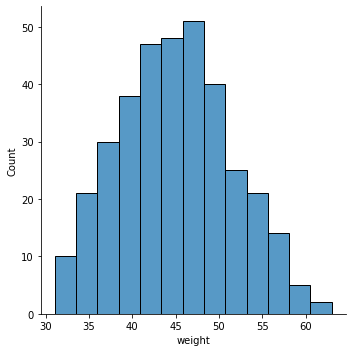

In [ ]:
sns.displot(dataAdult, x='height', kind='hist')
sns.displot(dataAdult, x='weight', kind='hist')

In [ ]:
with pm.Model() as mht:
    muHt=pm.Normal('muht',mu=170.0,sd=30,testval=adultHtMean)
    sigmaHt=pm.Uniform('sigmaht',lower=0,upper=60,testval=adultHtSD)
    height=pm.Normal('height',mu=muHt,sd=sigmaHt,observed=dataAdult.height)
    trcHt=pm.sample(5000,tune=1000)

/home/hk/anaconda3/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigmaht, muht]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 9 seconds.


In [ ]:
az.summary(trcHt)


/home/hk/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
muht,154.605,0.413,153.833,155.389,0.003,0.002,17976.0,17974.0,17979.0,13757.0,1.0
sigmaht,7.768,0.303,7.203,8.333,0.002,0.002,16660.0,16564.0,16790.0,13935.0,1.0


/home/hk/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'muht'}>,
        <AxesSubplot:title={'center':'muht'}>],
       [<AxesSubplot:title={'center':'sigmaht'}>,
        <AxesSubplot:title={'center':'sigmaht'}>]], dtype=object)

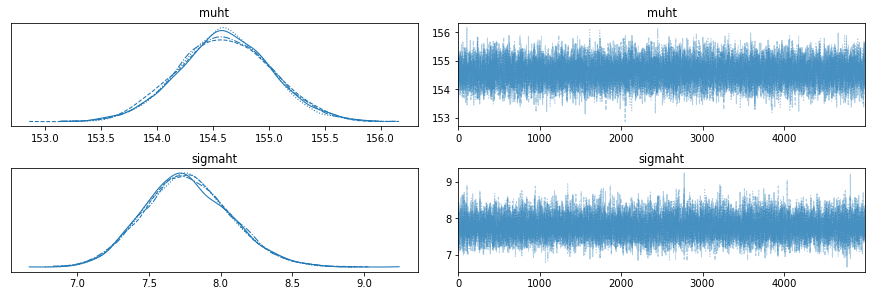

In [ ]:
az.plot_trace(trcHt)